# key for theyworkforyou API
DN8s9LBm8jMBFZihXEG2gqzx

In [1]:
APIkey = 'DN8s9LBm8jMBFZihXEG2gqzx'

In [2]:
import requests

In [3]:
def getQuota():
    quotaurl = 'https://www.theyworkforyou.com/api/getQuota'
    response = requests.get(quotaurl, params={'key':APIkey})
    return response.json()['quota']

In [4]:
getQuota()

{'limit': 1000, 'current': 282}

In [16]:
import postcodes_uk

In [17]:
postcodes_uk.validate('GL205FL')

True

In [18]:
def getMP(postcode):
    postcode = postcode.upper()
    params = {'key':APIkey}
    if postcodes_uk.validate(postcode):
        params['postcode'] = postcode
    else:
        params['constituency'] = postcode
    
    url = 'https://www.theyworkforyou.com/api/getMP'
    response = requests.get(url, params=params)
    return response.json()

In [19]:
MP = getMP('Tewkesbury')

In [20]:
MP

{'member_id': '42617',
 'house': '1',
 'constituency': 'Tewkesbury',
 'party': 'Conservative',
 'entered_house': '2019-12-13',
 'left_house': '9999-12-31',
 'entered_reason': 'general_election',
 'left_reason': 'still_in_office',
 'person_id': '10505',
 'lastupdate': '2019-12-13 05:21:12',
 'title': '',
 'given_name': 'Laurence',
 'family_name': 'Robertson',
 'full_name': 'Laurence Robertson',
 'url': '/mp/10505/laurence_robertson/tewkesbury',
 'image': '/people-images/mpsL/10505.jpg',
 'image_height': 160,
 'image_width': 120,
 'office': [{'moffice_id': 'uk.parliament.data/Member/253/Committee/11/1',
   'dept': 'Panel of Chairs',
   'position': 'Member',
   'from_date': '2020-01-15',
   'to_date': '9999-12-31',
   'person': '10505',
   'source': ''}]}

In [21]:
def getHansard(personID):
    params = {'key':APIkey}
    params['person'] = personID
    params['num'] = 512
    url = 'https://www.theyworkforyou.com/api/getHansard'
    response = requests.get(url, params=params)
    data = response.json()
    params['page'] = 1
    print('Getting %d results' % data['info']['total_results'])
    while True:
        params['page'] += 1
        response = requests.get(url, params=params)
        data0 = response.json()
        if len(data0['rows']) == 0:
            break
        data['rows'].extend(data0['rows'])
        print('%d : %d' % (len(data['rows']), data['info']['total_results']))
    return data

In [22]:
data = getHansard(MP['person_id'])

Getting 5254 results
1021 : 5254
1533 : 5254
2045 : 5254
2557 : 5254
3069 : 5254
3581 : 5254
4093 : 5254
4605 : 5254
5117 : 5254
5251 : 5254


In [23]:
#data['rows'][-1]

In [24]:


from bs4 import BeautifulSoup
BeautifulSoup(data['rows'][0]['body'], "html.parser").text



'To ask the Secretary of State for Transport, whether he has had discussions with the Chancellor of the Exchequer on increasing approved business travel mileage rates, in the context of rising fuel costs; and if he will make a statement.'

In [25]:
from bs4 import BeautifulSoup
import string
extracts = [BeautifulSoup(x['body'], 'html.parser').text.lower().translate(str.maketrans('', '', string.punctuation)) for x in data['rows']]

In [26]:
extracts[0]


'to ask the secretary of state for transport whether he has had discussions with the chancellor of the exchequer on increasing approved business travel mileage rates in the context of rising fuel costs and if he will make a statement'

In [27]:
extracts = [e for e in extracts if len(e) > 512]

In [28]:
100.0 * len([x for x in extracts if 'horse' in x]) / len(extracts)

6.924882629107981

In [29]:
from wordcloud import WordCloud

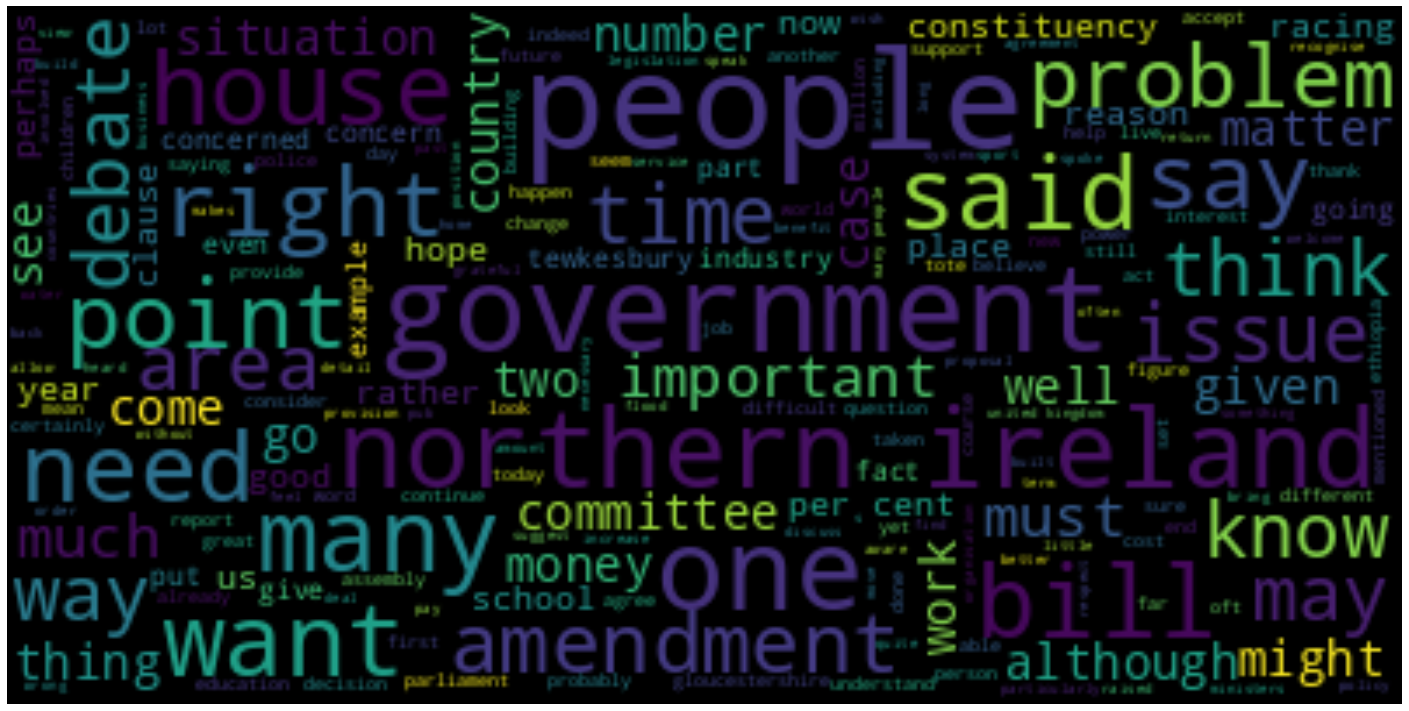

In [30]:
import matplotlib.pyplot as plt

# lower max_font_size
wc = WordCloud(max_font_size=40, background_color="black")
wc.stopwords = wc.stopwords.union({'speaker', 'secretary',
                                   'state', 'statement',
                                  'will', 'make', 'available'
                                   'made', 'ask', 'steps', 'b',
                                  'assessment', 'made', 'whether',
                                  'ensure', 'taking', 'take',
                                  'use', 'member', 'minister', 'friend', 'members', 'hon', 'mr','gentleman', 'lady', 'u', ';'})
wordcloud = wc.generate('\n'.join(extracts).lower())
plt.figure( figsize=(25,15) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [47]:
from rake_nltk import Rake
rake_nltk_var = Rake()
keywords = []
for e in extracts:
    rake_nltk_var.extract_keywords_from_text(e)
    keywords.append(rake_nltk_var.get_ranked_phrases()[:8])

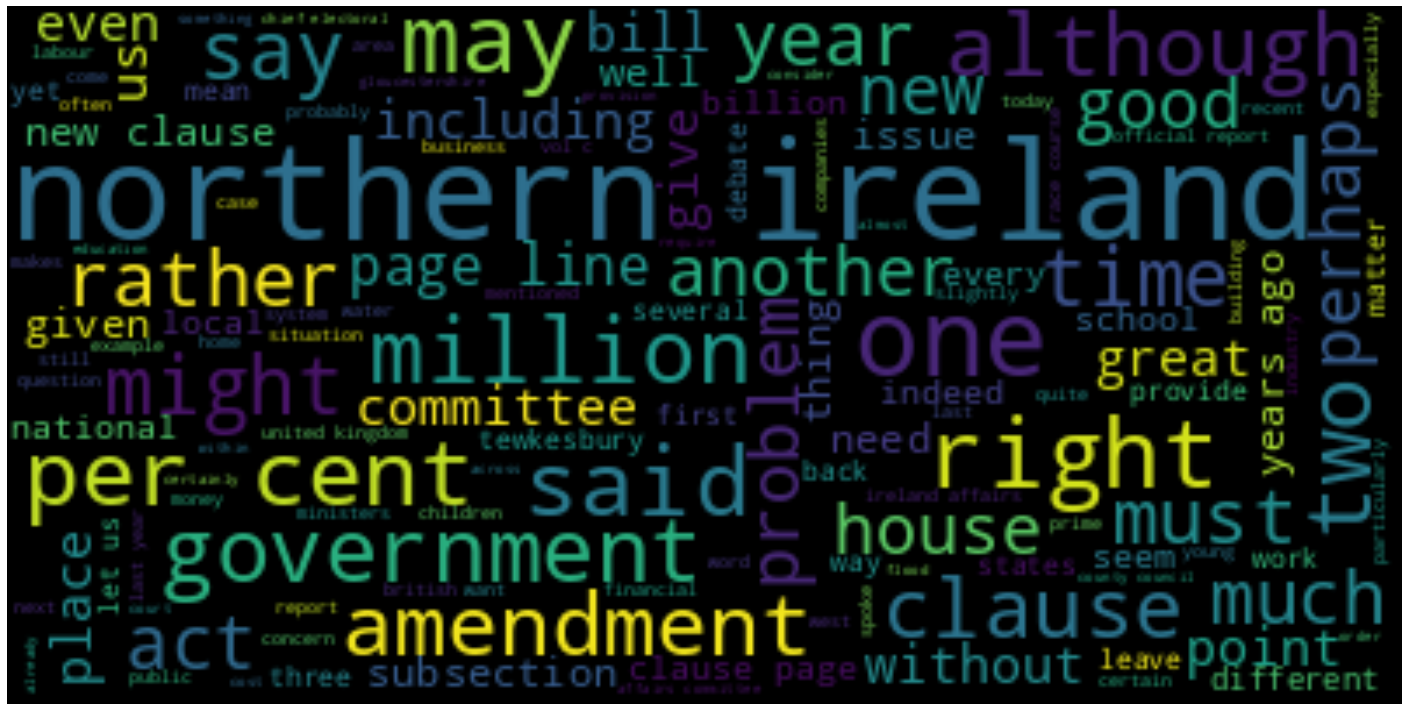

In [56]:
# lower max_font_size
wc = WordCloud(max_font_size=40, background_color="black")
wc.stopwords = wc.stopwords.union({'speaker', 'secretary',
                                   'state', 'statement',
                                  'will', 'make', 'available'
                                   'made', 'ask', 'steps', 'b',
                                  'assessment', 'made', 'whether',
                                  'ensure', 'taking', 'take',
                                  'use', 'member', 'minister', 'friend',
                                'members', 'hon', 'mr','gentleman',
                                 'lady', 'u', ';',
                                 'people', 'many'})
wordcloud = wc.generate(' '.join([' '.join(k) for k in keywords]))
plt.figure( figsize=(25,15) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [46]:
rake_nltk_var.get_ranked_phrases()[:8]

['small majority — 329 per cent — voted',
 'conservative party could enjoy almost perpetual government',
 'parliament happily 2 may provided',
 'least 40 per cent',
 'gloucestershire county council rather',
 'south cambridgeshire mr lansley',
 'edinburgh west mr gorrie',
 'unashamedly british ticket fighting']

In [57]:
K = ' '.join([' '.join(k) for k in keywords])

In [66]:
K[:128]

'electronic countermeasures four companies made bids including two right hon friend look competition would take place strong supp'

In [62]:
K.count(' ')

25036